## Feature Selection using correlation - pearson's coefficient

- in this step, we remove features that are highly correlated

In [3]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['MEDV'] = data.target 

/Users/anushkasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [5]:
## creating independant and dependant feature split 
X = df.drop(['MEDV'],axis=1)
y = df[['MEDV']]

In [6]:
## train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [7]:
len(X_train)
len(X_test)

152

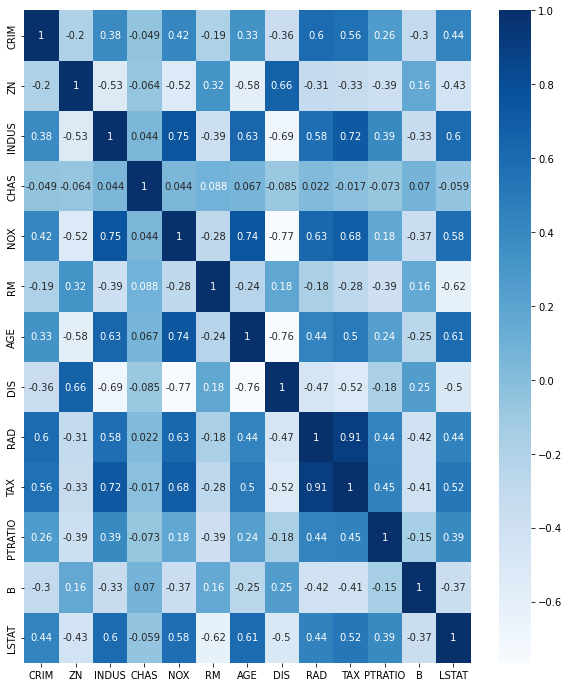

In [9]:
import seaborn as sns
plt.figure(figsize=(10,12))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

## the heatmap above has given us some understanding of how they're correlated - for example, TAX is highly correlated with RAD. the function below will select the highly correlated features 

In [21]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
         for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > threshold:
                    col_name = corr_matrix.columns[i]
                    col_corr.add(col_name)
    return col_corr

In [23]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

4

In [24]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

## applying the same to santder dataset

In [26]:
df = pd.read_csv('santander.csv',nrows=10000)

In [32]:
X = df.drop(['TARGET'],axis=1)
y=df['TARGET']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [40]:
corr_feature = correlation(X_train,0.8)

In [41]:
len(corr_feature)

193